In [20]:
# Fonction pour charger un fichier texte avec gestion d'encodage
def load_file(file_path, encoding='utf-8'):
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            return file.readlines()
    except UnicodeDecodeError:
        # Si 'utf-8' échoue, essayer 'latin1' ou 'cp1252'
        print(f"Erreur d'encodage avec {encoding}. Tentative avec 'latin1'.")
        with open(file_path, 'r', encoding='latin1') as file:
            return file.readlines()

# Chargement des fichiers contenant les dialogues, les sujets, les actes et les émotions
dialogues_cleaned = load_file('C:/Users/hp/Desktop/ai/EMNLP_dataset/dialogues_text.txt')  # Conversations
dialogues_topic = load_file('C:/Users/hp/Desktop/ai/EMNLP_dataset/dialogues_topic.txt')      # Sujets des répliques
dialogues_act = load_file('C:/Users/hp/Desktop/ai/EMNLP_dataset/dialogues_act.txt')          # Actes des répliques
dialogues_emotion = load_file('C:/Users/hp/Desktop/ai/EMNLP_dataset/dialogues_emotion.txt')  # Émotions des répliques

# Vérifier les 2 premières lignes des fichiers chargés pour validation
print("Dialogue examples:")
print(dialogues_cleaned[:2])

print("\nTopic examples:")
print(dialogues_topic[:2])

print("\nAct examples:")
print(dialogues_act[:2])

print("\nEmotion examples:")
print(dialogues_emotion[:2])

# Fusionner les données dans une seule liste
data = []
for i in range(len(dialogues_cleaned)):
    dialogue = dialogues_cleaned[i].strip().split('__eou__')  # Séparer les répliques du dialogue
    topic = dialogues_topic[i].strip()  # Un seul sujet pour toute la conversation
    act = dialogues_act[i].strip().split()  # Les actes sont des indices pour chaque réplique
    emotion = dialogues_emotion[i].strip().split()  # Les émotions sont des indices pour chaque réplique
    
    # Créer un dictionnaire pour chaque entrée de dialogue
    dialogue_data = []
    for j in range(len(dialogue)):
        if dialogue[j].strip():  # Ignorer les répliques vides
            dialogue_data.append({
                'dialogue': dialogue[j].strip(),
                'topic': topic,  # Le même sujet pour toute la conversation
                'act': act[j] if j < len(act) else None,
                'emotion': emotion[j] if j < len(emotion) else None
            })
    
    if dialogue_data:  # Ajouter le dialogue structuré dans la liste globale seulement si non vide
        data.append(dialogue_data)

# Affichage des 2 premiers exemples fusionnés
for item in data[:2]:
    print(item)


Dialogue examples:
["The kitchen stinks . __eou__ I'll throw out the garbage . __eou__\n", 'So Dick , how about getting some coffee for tonight ? __eou__ Coffee ? I don ’ t honestly like that kind of stuff . __eou__ Come on , you can at least try a little , besides your cigarette . __eou__ What ’ s wrong with that ? Cigarette is the thing I go crazy for . __eou__ Not for me , Dick . __eou__\n']

Topic examples:
['1\n', '1\n']

Act examples:
['3 4 \n', '3 4 3 1 1 \n']

Emotion examples:
['2 0 \n', '4 2 0 1 0 \n']
[{'dialogue': 'The kitchen stinks .', 'topic': '1', 'act': '3', 'emotion': '2'}, {'dialogue': "I'll throw out the garbage .", 'topic': '1', 'act': '4', 'emotion': '0'}]
[{'dialogue': 'So Dick , how about getting some coffee for tonight ?', 'topic': '1', 'act': '3', 'emotion': '4'}, {'dialogue': 'Coffee ? I don ’ t honestly like that kind of stuff .', 'topic': '1', 'act': '4', 'emotion': '2'}, {'dialogue': 'Come on , you can at least try a little , besides your cigarette .', 'to

In [26]:
# Vérifier la taille des différentes listes
print(f"Nombre total de dialogues: {len(dialogues_cleaned)}")
print(f"Nombre total de sujets: {len(dialogues_topic)}")
print(f"Nombre total d'actes: {len(dialogues_act)}")
print(f"Nombre total d'émotions: {len(dialogues_emotion)}")


Nombre total de dialogues: 13118
Nombre total de sujets: 13118
Nombre total d'actes: 13118
Nombre total d'émotions: 13118


In [27]:
from collections import Counter

# Compter les émotions et les actes pour chaque réplique
emotion_counts = Counter()
act_counts = Counter()

for dialogue_data in data:
    for entry in dialogue_data:
        if entry['emotion']:
            emotion_counts[entry['emotion']] += 1
        if entry['act']:
            act_counts[entry['act']] += 1

# Afficher les comptages
print(f"Comptage des émotions: {emotion_counts}")
print(f"Comptage des actes: {act_counts}")


Comptage des émotions: Counter({'0': 85572, '4': 12885, '6': 1823, '5': 1150, '1': 1022, '2': 353, '3': 174})
Comptage des actes: Counter({'1': 46532, '2': 29428, '3': 17295, '4': 9724})


In [28]:
# Nettoyer les dialogues en supprimant les répliques vides
data_cleaned = []
for dialogue_data in data:
    cleaned_dialogue_data = [entry for entry in dialogue_data if entry['dialogue'].strip()]
    if cleaned_dialogue_data:
        data_cleaned.append(cleaned_dialogue_data)

# Vérifier les deux premiers exemples nettoyés
print(data_cleaned[:2])


[[{'dialogue': 'The kitchen stinks .', 'topic': '1', 'act': '3', 'emotion': '2'}, {'dialogue': "I'll throw out the garbage .", 'topic': '1', 'act': '4', 'emotion': '0'}], [{'dialogue': 'So Dick , how about getting some coffee for tonight ?', 'topic': '1', 'act': '3', 'emotion': '4'}, {'dialogue': 'Coffee ? I don ’ t honestly like that kind of stuff .', 'topic': '1', 'act': '4', 'emotion': '2'}, {'dialogue': 'Come on , you can at least try a little , besides your cigarette .', 'topic': '1', 'act': '3', 'emotion': '0'}, {'dialogue': 'What ’ s wrong with that ? Cigarette is the thing I go crazy for .', 'topic': '1', 'act': '1', 'emotion': '1'}, {'dialogue': 'Not for me , Dick .', 'topic': '1', 'act': '1', 'emotion': '0'}]]


C:\Users\hp\AppData\Local\Temp\ipykernel_7872\920129238.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_labels, y=emotion_values, palette='viridis')


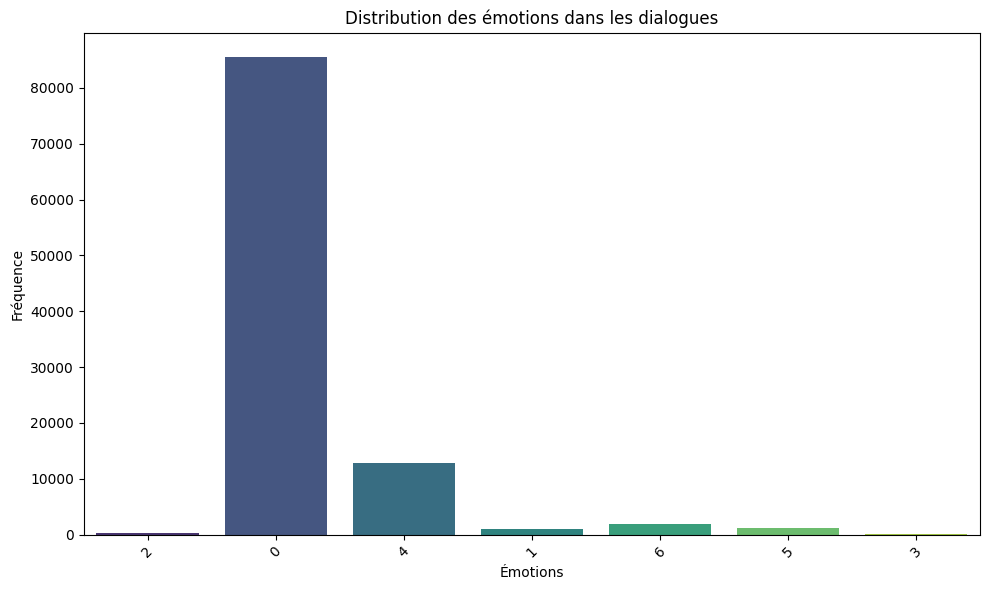

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir les comptages en liste de tuples pour la visualisation
emotion_labels = list(emotion_counts.keys())
emotion_values = list(emotion_counts.values())

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_labels, y=emotion_values, palette='viridis')
plt.title('Distribution des émotions dans les dialogues')
plt.xlabel('Émotions')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


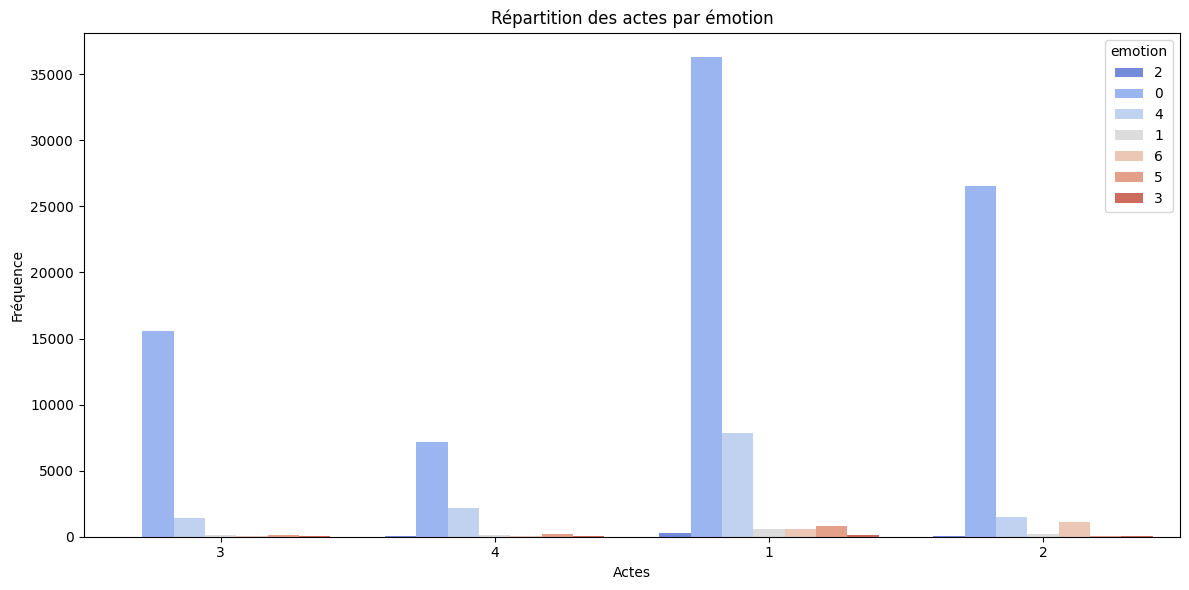

In [32]:
import pandas as pd

# Liste pour stocker les données avant de les convertir en DataFrame
act_emotion_data = []

# Collecter les paires 'act' et 'emotion' dans la liste
for dialogue_data in data_cleaned:
    for entry in dialogue_data:
        if entry['act'] and entry['emotion']:
            act_emotion_data.append({'act': entry['act'], 'emotion': entry['emotion']})

# Créer le DataFrame à partir de la liste collectée
act_emotion_df = pd.DataFrame(act_emotion_data)

# Afficher la distribution des actes par émotion
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='act', hue='emotion', data=act_emotion_df, palette='coolwarm')
plt.title('Répartition des actes par émotion')
plt.xlabel('Actes')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convertir les dialogues et émotions en listes de texte et étiquettes
dialogues = []
emotions = []

for dialogue_data in data_cleaned:
    for entry in dialogue_data:
        dialogues.append(entry['dialogue'])
        emotions.append(entry['emotion'])

# Découper les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(dialogues, emotions, test_size=0.2, random_state=42)

# Vérifier les tailles des ensembles de données
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 82384, Test size: 20596


In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Créer le tokenizer pour tokeniser les dialogues
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convertir les dialogues en séquences de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Appliquer un padding pour uniformiser la longueur des séquences
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Afficher un exemple
print(f"Exemple de dialogue transformé : {X_train_pad[0]}")


Exemple de dialogue transformé : [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 59 39 82  1 86  1 12
  5 41 63 36]


In [37]:
# Vérifier si des éléments sont manquants dans y_train et y_test
print(f"Valeurs manquantes dans y_train : {any(x is None for x in y_train)}")
print(f"Valeurs manquantes dans y_test : {any(x is None for x in y_test)}")


Valeurs manquantes dans y_train : True
Valeurs manquantes dans y_test : False


In [38]:
# Filtrer les répliques et émotions avec des valeurs valides
valid_indices = [i for i, emotion in enumerate(y_train) if emotion is not None]
X_train_filtered = [X_train[i] for i in valid_indices]
y_train_filtered = [y_train[i] for i in valid_indices]

valid_indices = [i for i, emotion in enumerate(y_test) if emotion is not None]
X_test_filtered = [X_test[i] for i in valid_indices]
y_test_filtered = [y_test[i] for i in valid_indices]


In [40]:
# Convertir y_train et y_test en entiers (si nécessaire)
y_train_filtered = [int(emotion) for emotion in y_train_filtered]
y_test_filtered = [int(emotion) for emotion in y_test_filtered]


In [41]:
from keras.utils import to_categorical

# Convertir les étiquettes émotionnelles en format catégoriel
y_train_cat = to_categorical(y_train_filtered, num_classes=7)  # Exemple avec 7 émotions possibles
y_test_cat = to_categorical(y_test_filtered, num_classes=7)


In [43]:
print(f"Shape de X_train_pad: {len(X_train_pad)}")
print(f"Shape de y_train_cat: {len(y_train_cat)}")


Shape de X_train_pad: 82384
Shape de y_train_cat: 82383


In [44]:
# S'assurer que X_train_pad et y_train_cat ont le même nombre d'échantillons
min_length = min(len(X_train_pad), len(y_train_cat))
X_train_pad = X_train_pad[:min_length]
y_train_cat = y_train_cat[:min_length]

# Vérifier les tailles après ajustement
print(f"Shape après ajustement de X_train_pad: {len(X_train_pad)}")
print(f"Shape après ajustement de y_train_cat: {len(y_train_cat)}")


Shape après ajustement de X_train_pad: 82383
Shape après ajustement de y_train_cat: 82383


In [51]:
import numpy as np

# Charger les embeddings GloVe
embedding_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefficients

print(f"Nombre de mots dans les embeddings GloVe : {len(embedding_index)}")


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'